In [43]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [45]:
# MPC Tracking Test Cases for Deliverable 3.2
# 
# According to project description, test:
# - Origin to 3 m/s for all three axes
# - Origin to 35° for roll angle

**Test 1: Track Z Velocity (vz = 3 m/s)**

Test tracking from origin to 3 m/s vertical velocity.

In [46]:
# Test 1: Track vz = 3 m/s
Ts = 0.05
sim_time = 10.0
H = 5.0

# Initial state: origin (all zeros)
x0 = np.zeros(12)

# Target state: vz = 3 m/s (index 8)
# State vector: [wx, wy, wz, alpha, beta, gamma, vx, vy, vz, x, y, z]
x_target = np.zeros(12)
x_target[8] = 3.0  # vz = 3 m/s

print("Test 1: Tracking vz = 3 m/s")
print(f"Initial state: vz = {x0[8]:.2f} m/s")
print(f"Target state: vz = {x_target[8]:.2f} m/s")

# Create rocket and MPC controller
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl.new_controller(rocket, Ts, H)

# Simulate
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="linear"
)

# Visualize
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)

print(f"Final vz: {x_cl[8, -1]:.2f} m/s (target: {x_target[8]:.2f} m/s)")

Test 1: Tracking vz = 3 m/s
Initial state: vz = 0.00 m/s
Target state: vz = 3.00 m/s
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

Final vz: 3.00 m/s (target: 3.00 m/s)


**Test 2: Track Y Velocity (vy = 3 m/s)**

Test tracking from origin to 3 m/s velocity in Y direction.

In [ ]:
# Test 2: Track vy = 3 m/s
x0 = np.zeros(12)
x_target = np.zeros(12)
x_target[7] = 3.0  # vy = 3 m/s

print("Test 2: Tracking vy = 3 m/s")
print(f"Initial state: vy = {x0[7]:.2f} m/s")
print(f"Target state: vy = {x_target[7]:.2f} m/s")

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl.new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)

print(f"Final vy: {x_cl[7, -1]:.2f} m/s (target: {x_target[7]:.2f} m/s)")

**Test 3: Track X Velocity (vx = 3 m/s)**

Test tracking from origin to 3 m/s velocity in X direction.

In [39]:
# Test 3: Track vx = 3 m/s
x0 = np.zeros(12)
x_target = np.zeros(12)
x_target[6] = 3.0  # vx = 3 m/s

print("Test 3: Tracking vx = 3 m/s")
print(f"Initial state: vx = {x0[6]:.2f} m/s")
print(f"Target state: vx = {x_target[6]:.2f} m/s")

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl.new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)

print(f"Final vx: {x_cl[6, -1]:.2f} m/s (target: {x_target[6]:.2f} m/s)")

Test 3: Tracking vx = 3 m/s
Initial state: vx = 0.00 m/s
Target state: vx = 3.00 m/s
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: Warning: MPC status = user_limit

Simulating time 1.55: Warning: MPC status = user_limit

Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80:

Test 3: Tracking vx = 3 m/s
Initial state: vx = 0.00 m/s
Target state: vx = 3.00 m/s
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: Warning: MPC status = user_limit

Simulating time 1.55: Warning: MPC status = user_limit

Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80:

KeyboardInterrupt: 

**Test 4: Track Roll Angle (gamma = 35°)**

Test tracking from origin to 35° roll angle.

In [ ]:
# Test 4: Track gamma = 35°
x0 = np.zeros(12)
x_target = np.zeros(12)
x_target[5] = 35.0 * np.pi / 180.0  # gamma = 35° (in radians)

print("Test 4: Tracking gamma = 35°")
print(f"Initial state: gamma = {x0[5] * 180 / np.pi:.2f}°")
print(f"Target state: gamma = {x_target[5] * 180 / np.pi:.2f}°")

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl.new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)

print(f"Final gamma: {x_cl[5, -1] * 180 / np.pi:.2f}° (target: {x_target[5] * 180 / np.pi:.2f}°)")

**Velocity in x, y, z of 3m/s and 35deg of roll**

Plot of Closed and Open loop 


In [56]:
# Combined Test: Track vx, vy, vz = 3 m/s and gamma = 35°
# Switch between OPEN_LOOP and CLOSED_LOOP simulation

import matplotlib.pyplot as plt

# Close all previous figures to avoid memory issues
plt.close('all')

# Simulation mode selection
sim = "CLOSED_LOOP"  # Change to "OPEN_LOOP" to see open-loop behavior

x0 = np.zeros(12)
x_target = np.zeros(12)
x_target[5] = 35.0 * np.pi / 180.0  # gamma = 35° (in radians)
x_target[6] = 3.0  # vx = 3 m/s
x_target[7] = 3.0  # vy = 3 m/s
x_target[8] = 3.0  # vz = 3 m/s

print(f"Combined Tracking Test ({sim} mode)")
print(f"Initial state: vx={x0[6]:.2f} m/s, vy={x0[7]:.2f} m/s, vz={x0[8]:.2f} m/s, gamma={np.rad2deg(x0[5]):.2f}°")
print(f"Target state: vx={x_target[6]:.2f} m/s, vy={x_target[7]:.2f} m/s, vz={x_target[8]:.2f} m/s, gamma={np.rad2deg(x_target[5]):.2f}°")

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl.new_controller(rocket, Ts, H)

if sim == "CLOSED_LOOP":
    # Closed-loop: MPC recalculates control at each time step
    t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
        mpc, sim_time, H, x0, x_target=x_target, method="linear"
    )
elif sim == "OPEN_LOOP":
    # Open-loop: Calculate control once, extend to full simulation time
    u_first, x_pred, u_seq, t_pred = mpc.get_u(0.0, x0, x_target=x_target)
    
    # Extend control sequence from H seconds to sim_time seconds
    N_sim = int(sim_time / Ts)
    N_horizon = u_seq.shape[1]
    U_extended = np.zeros((4, N_sim))
    
    if N_horizon <= N_sim:
        U_extended[:, :N_horizon] = u_seq
        # Hold last control value for remaining time
        U_extended[:, N_horizon:] = u_seq[:, -1:].repeat(N_sim - N_horizon, axis=1)
    else:
        U_extended = u_seq[:, :N_sim]
    
    # Simulate with fixed control sequence (no MPC replanning)
    t_cl, x_cl, u_cl = rocket.simulate(x0, sim_time, U_extended, method="linear")
    
    # For compatibility with visualization, create dummy open-loop arrays
    t_ol = np.array([t_pred])
    x_ol = x_pred.reshape(1, 12, -1)
    u_ol = u_seq.reshape(1, 4, -1)

# Synchronize dimensions for animation
n_t = len(t_cl) - 1 if len(t_cl) > x_cl.shape[1] else len(t_cl)
n_x = x_cl.shape[1]
n_u = u_cl.shape[1]
n_anim = min(n_t, n_x, n_u)

# Animate
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:n_anim],
    x_cl[:, :n_anim],
    u_cl[:, :n_anim],
    Ref=x_target.reshape(-1, 1).repeat(n_anim, axis=1),
    T_ol=t_ol[..., :-1] if (sim == "CLOSED_LOOP" and t_ol.ndim > 1) else None,
    X_ol=x_ol if sim == "CLOSED_LOOP" else None,
    U_ol=u_ol if sim == "CLOSED_LOOP" else None,
)

print(f"\nFinal state:")
print(f"  vx: {x_cl[6, -1]:.2f} m/s (target: {x_target[6]:.2f} m/s)")
print(f"  vy: {x_cl[7, -1]:.2f} m/s (target: {x_target[7]:.2f} m/s)")
print(f"  vz: {x_cl[8, -1]:.2f} m/s (target: {x_target[8]:.2f} m/s)")
print(f"  gamma: {np.rad2deg(x_cl[5, -1]):.2f}° (target: {np.rad2deg(x_target[5]):.2f}°)")

Combined Tracking Test (CLOSED_LOOP mode)
Initial state: vx=0.00 m/s, vy=0.00 m/s, vz=0.00 m/s, gamma=0.00°
Target state: vx=3.00 m/s, vy=3.00 m/s, vz=3.00 m/s, gamma=35.00°
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: Warning: MPC status = user_limit

Simulating time 1.55: Warning: MPC status = user_limit

Simulating time 1.60: 
S

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…


Final state:
  vx: 3.00 m/s (target: 3.00 m/s)
  vy: 3.00 m/s (target: 3.00 m/s)
  vz: 3.00 m/s (target: 3.00 m/s)
  gamma: 34.97° (target: 35.00°)


**Static Plots: States and Inputs**

Visualize the complete trajectory using static plots. The plots will show different results depending on whether OPEN_LOOP or CLOSED_LOOP mode was used in the simulation above.


Plotting static graphs for CLOSED_LOOP mode...


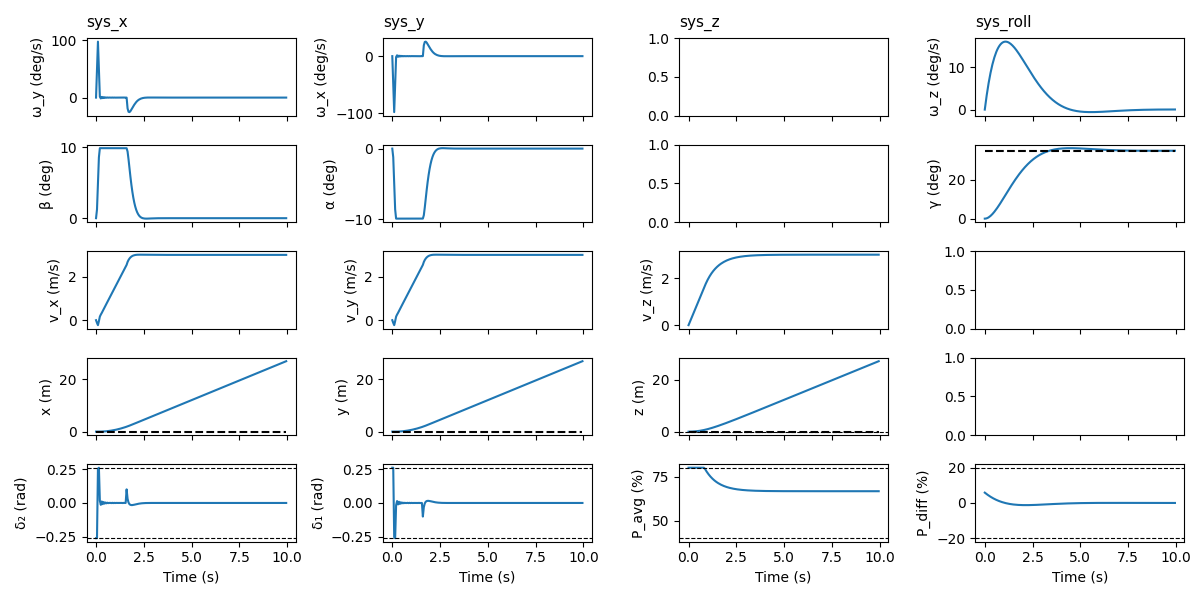

In [57]:
# Plot static graphs of states and inputs
# This will display the trajectory from the simulation above

print(f"\nPlotting static graphs for {sim} mode...")

# Synchronize dimensions: t_cl has one more element than x_cl/u_cl columns
n_points = min(len(t_cl), x_cl.shape[1], u_cl.shape[1])
plot_static_states_inputs(t_cl[:n_points], x_cl[:, :n_points], u_cl[:, :n_points], Ref=x_target)